## Random forests in Python

Next we will see how we can implement this model in Python. To do so, we will use the `scikit-learn` library.

### Random forests for classification

To exemplify the implementation of a random forest for classification, we will use the same data set as in the case of decision trees.

#### Step 1. Reading the processed dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


The train set will be used to train the model, while the test set will be used to evaluate its degree of effectiveness. Furthermore, it is not necessary for the predictor variables to be normalized, since random forests, and therefore decision trees, are not affected by the scale of the data because of the way they work: they make decisions based on certain feature thresholds, regardless of their scale.

#### Step 2: Initialization and training of the model

In [2]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Once the model has been trained correctly, we can visualize the random forest with the same library. This visualization will show each complete derived tree:

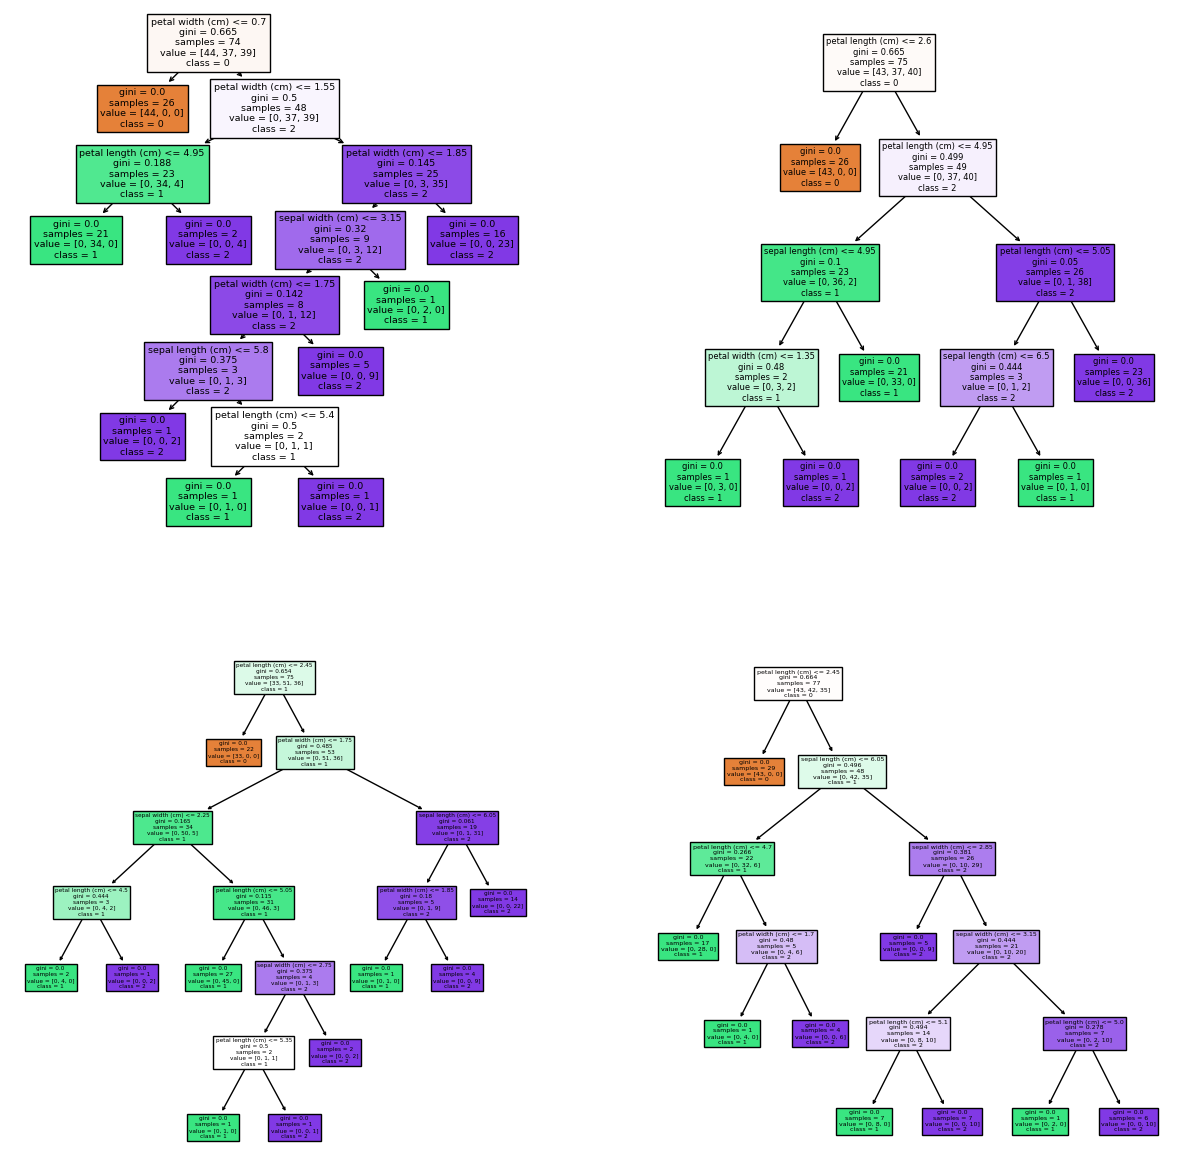

In [3]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

The training time of a model will depend, first of all, on the size of the dataset (instances and features), and also on the number of trees we want our random forest to have.

#### Step 3: Model prediction

Once the model has been trained, it can be used to predict with the test data set.

In [4]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

With raw data, it is very difficult to know whether the model is getting it right or not. To do this, we must compare it with reality. There are many metrics to measure the effectiveness of a model in predicting, including **accuracy**, which is the fraction of predictions that the model makes correctly.

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

The model is perfect!

#### Step 4: Saving the model

Once we have the model we were looking for (presumably after hyperparameter optimization), to be able to use it in the future, it is necessary to store it in our directory, together with the seed.

In [6]:
from pickle import dump

dump(model, open("random_forest_classifier_default_42.sav", "wb"))

Adding an explanatory name to the model is vital because, in the event of losing the code that generated it, we will know several important details. Firstly, we will understand its configuration (in this case, we use `default` because we haven't customized any of the model's hyperparameters; we've kept the defaults of the function). Secondly, we will have the seed necessary to replicate the random components of the model, indicated by adding a number to the filename, such as `42`.

### Random forest for regression

To exemplify the implementation of a random forest, we will use a data set with a few instances that has been previously treated with a full EDA. We will use the same data set as in the case of decision trees.

#### Step 1. Reading the processed dataset

In [7]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

train_data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,8.0,4447,8577,0.529,464
1,7.5,4870,2351,0.529,414
2,8.0,5319,11868,0.451,344
3,7.0,4345,3905,0.672,968
4,7.5,3357,4121,0.547,628


In [8]:
X_train = train_data.drop(["Petrol_Consumption"], axis = 1)
y_train = train_data["Petrol_Consumption"]
X_test = test_data.drop(["Petrol_Consumption"], axis = 1)
y_test = test_data["Petrol_Consumption"]

The train set will be used to train the model, while the test set will be used to evaluate its degree of effectiveness. Furthermore, it is not necessary for the predictor variables to be normalized, since random forests, and therefore decision trees, are not affected by the scale of the data because of the way they work: they make decisions based on certain feature thresholds, regardless of their scale.

#### Step 2: Initialization and training of the model

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Step 3: Model prediction

Once the model has been trained, it can be used ​to make predictions using the test portion of the dataset.

In [10]:
y_pred = model.predict(X_test)
y_pred

array([598.62, 585.71, 581.46, 600.02, 497.24, 602.8 , 513.01, 831.44,
       546.3 , 580.29])

To calculate the effectiveness of the model, we will use the **mean squared error** (*MSE*):

In [11]:
from sklearn.metrics import mean_squared_error

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Mean squared error: 6835.456590000002


#### Step 4: Saving the model

Once we have the model we were looking for (presumably after hyperparameter optimization), to be able to use it in the future, it is necessary to store it in our directory, together with the seed.

In [12]:
dump(model, open("random_forest_regressor_default_42.sav", "wb"))

Adding an explanatory name to the model is vital because, in the event of losing the code that generated it, we will know several important details. Firstly, we will understand its configuration (in this case, we use `default` because we haven't customized any of the model's hyperparameters; we've kept the defaults of the function). Secondly, we will have the seed necessary to replicate the random components of the model, indicated by adding a number to the filename, such as `42`.